<center><h1><b>Practice 02 - BONUS</b></h1></center>

- Full name: Võ Nguyễn Hoàng Kim 
- Student ID: 21127090

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read data of covid-19-deaths.csv
df = pd.read_csv('data/covid-19-deaths.csv')
df_countries = df.groupby("Country/Region").sum()
df_countries

,Unnamed: 0,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,33.939110,67.709953,0,0,0,0,0,0,...,5283,5360,5415,5477,5561,5561,5561,5791,5791,5923
Albania,1,0,41.153300,20.168300,0,0,0,0,0,0,...,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456
Algeria,2,0,28.033900,1.659600,0,0,0,0,0,0,...,3765,3775,3786,3798,3811,3824,3836,3851,3867,3882
Andorra,3,0,42.506300,1.521800,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127
Angola,4,0,-11.202700,17.873900,0,0,0,0,0,0,...,915,920,925,925,928,929,935,939,941,946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,274,0,14.058324,108.277199,0,0,0,0,0,0,...,90,97,102,104,110,112,119,125,132,138
West Bank and Gaza,275,0,31.952200,35.233200,0,0,0,0,0,0,...,3573,3576,3577,3577,3579,3580,3582,3582,3582,3585
Yemen,276,0,15.552727,48.516388,0,0,0,0,0,0,...,1362,1363,1364,1365,1366,1366,1366,1366,1366,1366


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21924\3261892812.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  c_df.index = pd.to_datetime(c_df.index)


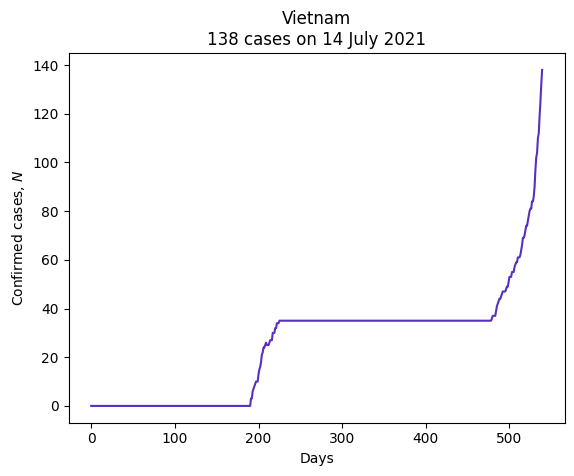

In [3]:
# Plot the first graph - line graph
def plot1(country):
    c_df = df_countries.loc[country, df_countries.columns[4:]]
    
    # convert the index to proper datetime object
    c_df.index = pd.to_datetime(c_df.index)
    
    # get the number of column
    n = len(c_df)

    # setting characteristics for the graph
    plt.plot(range(n), c_df.values, '#5730C2')
    plt.xlabel('Days')
    plt.ylabel('Confirmed cases, $N$')
    title = '{}\n{} cases on {}'.format(country, c_df[-1],c_df.index[-1].strftime('%d %B %Y'))
    plt.title(title)
    
    plt.show()
    
plot1("Vietnam")
 

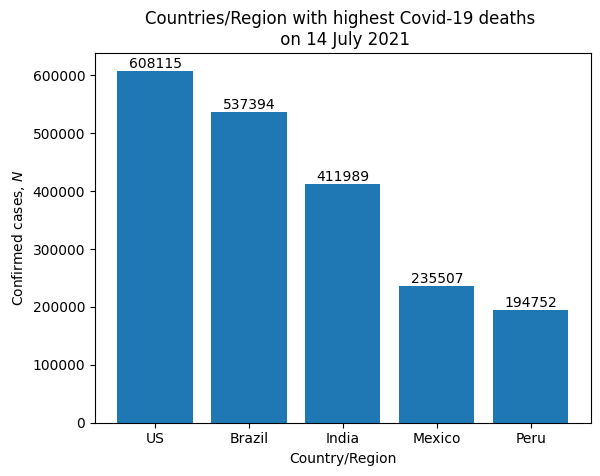

In [4]:
# plot the second graph - bar graph
def visualizeTopCountryInDay(neededDay):
    top5 = df_countries.sort_values(by= neededDay, ascending=False).head()
    labels = top5.index
    
    # convert to datetime object
    date = pd.to_datetime(neededDay)
    
    # set characteristics of the graph 
    plt.bar(labels, top5[neededDay])
    
    # write down specific figures
    for i, value in enumerate(top5[neededDay]):
        plt.text(i, value, str(value), ha='center', va='bottom')
        
    plt.xlabel("Country/Region")
    plt.ylabel("Confirmed cases, $N$")
    
    title = "Countries/Region with highest Covid-19 deaths \n on {}".format(date.strftime('%d %B %Y'))
    plt.title(title)
    
    plt.show()
    
visualizeTopCountryInDay("7/14/21")

<h2>Use others libraries to visualize the dataset</h2>

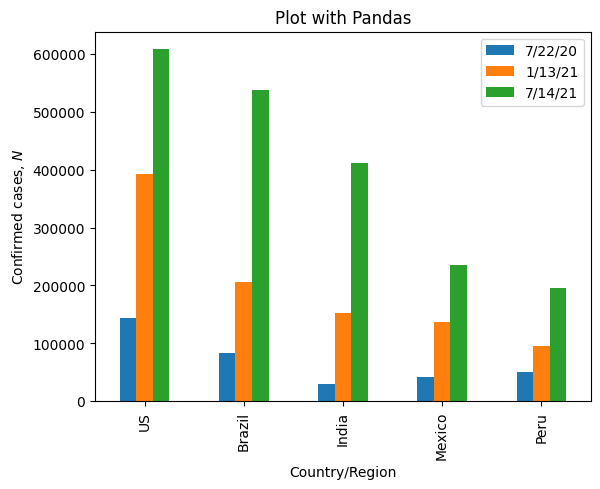

In [5]:
# use pandas plot to visualize the data set
date = ["7/22/20", "1/13/21", "7/14/21"]
c_df = df_countries.sort_values(by = "1/13/21", ascending=False).head()
c_df["Country/Region"] = c_df.index

c_df.plot(x = "Country/Region", y=date, kind='bar')
plt.ylabel('Confirmed cases, $N$')
plt.title("Plot with Pandas")
plt.show()



Text(0.5, 1.0, 'Plot with Seaborn')

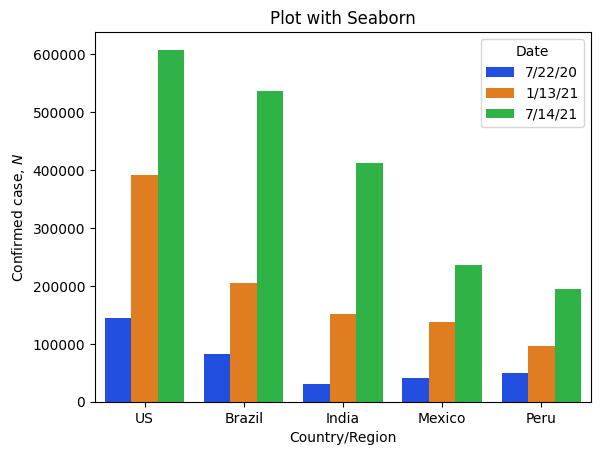

In [6]:
# Use seaborn to plot the dataset
date = ["7/22/20", "1/13/21", "7/14/21"]
c_df = df_countries.sort_values(by = "1/13/21", ascending=False).head()
c_df["Country/Region"] = c_df.index
c_df_melted = c_df.melt(id_vars="Country/Region", value_vars=date, var_name="Date", value_name="Value")

sns.barplot(x="Country/Region", y="Value", hue="Date", data=c_df_melted, palette="bright")
plt.ylabel("Confirmed case, $N$")
plt.title("Plot with Seaborn")